<a href="https://colab.research.google.com/github/panks11/CE802/blob/main/Pandas_and_preprocessing_in_scikit_learn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data preparation for machine learning

By: Jacobo Fernandez-Vargas and Luca Citi

Based on the [scikit-learn](http://scikit-learn.org/stable/tutorial/basic/tutorial.html) and [pandas](https://pandas.pydata.org/docs/getting_started/index.html) documentation

## Loading data with Pandas

Pandas is a powerfull library that is used in data analysis. We are not going to explore all its options but only focus in its functionalities that allow us to read data that contains non-numeric values such as text or dates. Pandas can also load data from excel files using the library 'xlrd'. Pandas supports reading and writing other complex data types such as sql, json, html and more as well.
When reading CSV files, Pandas tries to infer the type from the values in each column. We can force Pandas to treat a column as containing dates and even specify that we want to treat dates as 'dayfirst', i.e. DD/MM/YYYY (the way used in several countries, including the UK) rather than MM/DD/YYYY (like in the USA).
If we have all numeric values in a CSV format we can also use Numpy directly to read the table but will not have access to Pandas functionalities.

In [108]:
import pandas as pd

In [109]:
data = pd.read_csv('https://raw.githubusercontent.com/panks11/CE802/main/example1.csv', parse_dates=['Date'], dayfirst=True)
data

,Date,Time,Size,Colour,Cost,Label
0,2020-10-16,11.0,Small,Blue,109.521068,1
1,2020-10-16,13.0,Small,Red,112.141170,1
2,2020-10-16,17.0,Medium,Green,112.004677,1
3,2020-10-17,9.0,Large,Green,15.112922,0
4,2020-10-17,11.0,Large,Green,105.663642,1
5,2020-10-17,17.0,Medium,Green,5.158097,0
6,2020-10-18,9.0,Small,Blue,107.947930,1
7,2020-10-18,NaN,Large,Red,8.320838,0
8,2020-10-18,13.0,Large,Red,113.424684,1
9,2020-10-18,15.0,Small,Blue,103.223563,1


In the same way that the narray is the fundamental brick of the numpy library, the dataframe is the fundamental brick of the pandas library.
A dataframe is a a table that contains variables (or series as they are called in Pandas) as columns and samples in the rows. We can acces to each of the series using the name of the variable, either as an index of an array, or as field of the object.

The method `head` shows only the first 5 entries of the table.

In [110]:
print(data['Date'].head())
print(data.Date.head())

0   2020-10-16
1   2020-10-16
2   2020-10-16
3   2020-10-17
4   2020-10-17
Name: Date, dtype: datetime64[ns]
0   2020-10-16
1   2020-10-16
2   2020-10-16
3   2020-10-17
4   2020-10-17
Name: Date, dtype: datetime64[ns]


To select rows, we ca use either a conditional format or a a more traditional indexing.
For example let's select the rows for which the color is blue.

In [111]:
data[data["Colour"] == 'Blue']

,Date,Time,Size,Colour,Cost,Label
0,2020-10-16,11.0,Small,Blue,109.521068,1
6,2020-10-18,9.0,Small,Blue,107.947930,1
9,2020-10-18,15.0,Small,Blue,103.223563,1
11,2020-10-19,9.0,Medium,Blue,105.216665,1
13,2020-10-19,13.0,Large,Blue,15.599248,0
16,2020-10-20,NaN,Large,Blue,113.658567,1
18,2020-10-23,11.0,Medium,Blue,3.643787,0
21,2020-10-25,NaN,Large,Blue,10.699388,0
24,2020-10-26,13.0,Small,Blue,1.228235,0
27,2020-10-28,13.0,Large,Blue,12.414377,0


Now let's select the first five rows.

In [112]:
data.iloc[:5,:]

,Date,Time,Size,Colour,Cost,Label
0,2020-10-16,11.0,Small,Blue,109.521068,1
1,2020-10-16,13.0,Small,Red,112.141170,1
2,2020-10-16,17.0,Medium,Green,112.004677,1
3,2020-10-17,9.0,Large,Green,15.112922,0
4,2020-10-17,11.0,Large,Green,105.663642,1


Pandas is a really powerful tool but in the interest iof time we are not going to explain it further. However you can visit the [tutorials](https://pandas.pydata.org/docs/getting_started/index.html) to learn more about it.

## Prepare the data

Now that we have the data in the dataframe we are going to treat it to transform it into numerical values in a numpy array as it is easier to work with.
There are mainly two types of data that may be necessary to transform: dates and categorical values.
We can see what type of data we have on our dataframe:

In [113]:
data.dtypes

Date      datetime64[ns]
Time             float64
Size              object
Colour            object
Cost             float64
Label              int64
dtype: object

(Note that the methods we see in this section replace non-numerical values with floating point numbers _in place_, so if you run them again you will get an error since the column does not contain the expected type anymore.)

### Dates

To transform the data, a standard procedure is to change the date for the time that has passed since a specific time. This is as simple as:

In [114]:
time0 = pd.Timestamp('2020-08-01 00:00:00')
data['Date'] = (data['Date'] - time0).values.astype(float)
data.head()

,Date,Time,Size,Colour,Cost,Label
0,6.566400e+15,11.0,Small,Blue,109.521068,1
1,6.566400e+15,13.0,Small,Red,112.141170,1
2,6.566400e+15,17.0,Medium,Green,112.004677,1
3,6.652800e+15,9.0,Large,Green,15.112922,0
4,6.652800e+15,11.0,Large,Green,105.663642,1


### Categorical values

Categorical values are non numerical values that may have or not an ordinal relationship. If they have an ordinal relationship (for example: low, mid, high or small, big), the best practice is to transform directly to numerical value respecting the order.

Pandas allows use to do this using a dictionary and the method `replace`.

In [115]:
cleanup = {"Size": {"Small":0, "Medium":1, "Large":2}}
data.replace(cleanup, inplace=True)
data.head()

,Date,Time,Size,Colour,Cost,Label
0,6.566400e+15,11.0,0,Blue,109.521068,1
1,6.566400e+15,13.0,0,Red,112.141170,1
2,6.566400e+15,17.0,1,Green,112.004677,1
3,6.652800e+15,9.0,2,Green,15.112922,0
4,6.652800e+15,11.0,2,Green,105.663642,1


This method should not be used with categorical values with no ordinal relationship, for example the colour. Is red bigger than blue?


If we treat them as having ordinal relationship some algorithms, such as Decission Trees, may be unaffected by this. However, most algorithms will suffer (in terms of accuracy) when using this practice.
The 'proper' way to deal with this values is to create a number of variables equal to the the number of different values that the categorical value may take, and then set all to 0 except for one that will set to 1. This is called 'one-hot' encoding. In our case it would be somthing like:

Red -> \[0, 0, 1\]

Blue -> \[1, 0, 0\]

Green -> \[0, 1, 0\]

Fortunately, pandas makes this easy with the method `get_dummies`.

In [116]:
data = pd.get_dummies(data, columns= ['Colour'])
data.head()

,Date,Time,Size,Cost,Label,Colour_Blue,Colour_Green,Colour_Red
0,6.566400e+15,11.0,0,109.521068,1,1,0,0
1,6.566400e+15,13.0,0,112.141170,1,0,0,1
2,6.566400e+15,17.0,1,112.004677,1,0,1,0
3,6.652800e+15,9.0,2,15.112922,0,0,1,0
4,6.652800e+15,11.0,2,105.663642,1,0,1,0


We can now confirm that all columns have been converted to numeric types.

In [117]:
data.dtypes

Date            float64
Time            float64
Size              int64
Cost            float64
Label             int64
Colour_Blue       uint8
Colour_Green      uint8
Colour_Red        uint8
dtype: object

Finally we want to transfer our data to two numpy arrays, one containing the variables (features) and another the labels (ground truth).

In [118]:
import numpy as np
x = data.loc[:, data.columns != 'Label'].to_numpy()
y = data.loc[:, 'Label'].to_numpy()
print(x.shape, y.shape)

(33, 7) (33,)


## Data Visualization

Is a good practice to visualize the data to see if there is something wrong. For this, is the library matplotlib includes a lot of tools to help us. Getting familiar with this library (or a similar one) and its functions is essential to become a data scientist. There are too many functions to introduce, but functions like scatter, plot, or bar are really useful to visualize our data and explore it. Play with it!

### False predictors

In some ocassions we may have a variable that is a false predictor, meaning that it's been introduced in the data by mistake and contains information about the label. Let's imagine that we have a dataset of the clients of a bank, and we want to predict if a client will buy an insurance. One of the variables could be how much the client pays to the bank for its services. If this prize includes the cost of the insurance, this will result in a variable that may have 'perfect' prediction power but won't work during the deployment because we will detect only the clients that already have an insurance.

In our data there is one false predictor, could you point which one looking at the plots?

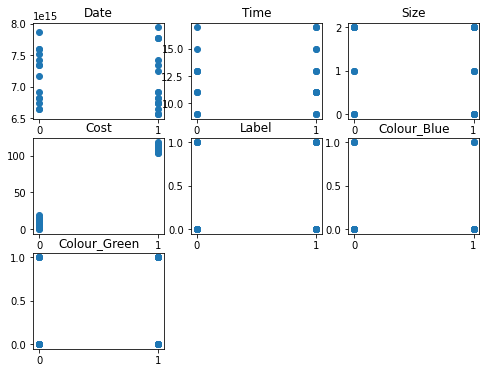

In [119]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,6))
for i in range(x.shape[1]):
    plt.subplot(3, 3, i+1)
    plt.scatter(y,x[:,i])
    plt.xticks([0, 1])
    plt.title(data.columns[i])

## Cross-validation
Learning the parameters of a prediction function and testing it on the same data is a methodological mistake: a model may memorise the training data perfectly and have a perfect score but would fail to predict anything useful on yet-unseen data. This situation is called overfitting. To avoid it, it is common practice when performing a (supervised) machine learning experiment to hold out part of the available data as a test set, which we will store in the variables `X_test` and `y_test`. 

Conceptually, we need to simulate the future situation, where we have trained our system with some data and, then, we apply it to some unseen data. However, to get better estimates of the accuracy of our model on new data, it is good practice to repeat the procedure after rotating which part of the data are used for train and which for testing. This way we can be sure that the results are not biased.

Scikit-learn is a library for machine learning (more on this in the next lab). It has a collection of classes which can be used to generate lists of train/test indices for popular cross-validation strategies.

They expose a `split` method which accepts the input dataset to be split and yields the train/test set indices for each iteration of the chosen cross-validation strategy.

In [120]:
from sklearn.model_selection import KFold, cross_val_score

k_fold = KFold(n_splits=5)
for train_indices, test_indices in k_fold.split(x):
    print('Train: %s | test: %s' % (train_indices, test_indices))

Train: [ 7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30
 31 32] | test: [0 1 2 3 4 5 6]
Train: [ 0  1  2  3  4  5  6 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30
 31 32] | test: [ 7  8  9 10 11 12 13]
Train: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 21 22 23 24 25 26 27 28 29 30
 31 32] | test: [14 15 16 17 18 19 20]
Train: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 27 28 29
 30 31 32] | test: [21 22 23 24 25 26]
Train: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26] | test: [27 28 29 30 31 32]


In [121]:
from sklearn.model_selection import KFold, cross_val_score

k_fold = KFold(n_splits=5,shuffle=True)
for train_indices, test_indices in k_fold.split(x):
    print('Train: %s | test: %s' % (train_indices, test_indices))

Train: [ 0  1  2  3  5  6  7  9 10 11 12 13 14 15 17 22 23 24 25 26 27 28 29 30
 31 32] | test: [ 4  8 16 18 19 20 21]
Train: [ 1  3  4  5  7  8  9 11 12 13 14 15 16 18 19 20 21 22 23 24 25 26 28 29
 30 32] | test: [ 0  2  6 10 17 27 31]
Train: [ 0  1  2  3  4  5  6  7  8  9 10 12 14 16 17 18 19 20 21 24 26 27 28 30
 31 32] | test: [11 13 15 22 23 25 29]
Train: [ 0  2  4  5  6  8 10 11 12 13 15 16 17 18 19 20 21 22 23 24 25 27 28 29
 30 31 32] | test: [ 1  3  7  9 14 26]
Train: [ 0  1  2  3  4  6  7  8  9 10 11 13 14 15 16 17 18 19 20 21 22 23 25 26
 27 29 31] | test: [ 5 12 24 28 30 32]


In [122]:
# without shuffle
# Train: [ 7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32] 
# test: [0 1 2 3 4 5 6] 0-6 are seperated
# with shuffle
# Train: [ 0  1  2  3  4  5  6  7  9 10 11 13 14 15 17 18 19 22 23 25 27 28 29 30 31 32]
# test: [ 8 12 16 20 21 24 26] randomly picked

Cross-validation is the cornerstone of supervised machine learning design. All the data-dependent manipulations (not only classification, but also pre-processing) must happen inside Cross-Validation loops when analysing the performance of a system.

Multiple cross-validation loops can be nested when performing hyper-paramether fitting. We will explore this in the next lab.

The `Kfold` class in sklearn, has another paramether, shuffle. Read the documentation about it and explore what changes when its value is True.

## Pre-processing

### Missing data

It is common to have missing values in some of the variables. We can see this counting the number of NaN (Not a Number) in our dataset:

In [123]:
np.sum(np.isnan(x), 0)

array([0, 4, 0, 0, 0, 0, 0])

Here we can see that the second variable on our dataset has some values missing.

#### Default value

The fastest and easiest way to deal with missing data, is to assing a default value (ex. 0). This is possible if we know something about the variable and which may be a good default value, but sometimes we don't.

#### Data-driven value

A better option, is to use a value that is derived from the data, such as the mean, median or other statistical value. However, as mentioned before, this should happen inside the cross-validation.

Here we calculate the mean of the second variable in our dataset for different folds. We use the function `nanmean` from numpy to calculate the mean of an array containing NaN values.

In [124]:
k_fold = KFold(n_splits=5)
for train_indices, test_indices in k_fold.split(x):
    print(np.nanmean(x[train_indices, 1]))

12.272727272727273
12.130434782608695
12.304347826086957
12.416666666666666
12.416666666666666


As you can see the value of that mean differs for each fold. This is why is important to do it inside the fold validation loop.

### Data transformation

Many algorithms work better when the data are inside a specific range, or when all the data have similar ranges. This is not the case for all the algorithms (they work equally well with unnormalised or normalised data).

#### Data-clipping

One option is to just set a maximum a default maximum and minimum value. For this, it is possible to use the method `clip` from numpy.

#### Scaling and Normalization

In the same way, as with the missing data, a better practice is to perfform this procedure in a data-driven manner. For this, sklearn provides several options in its 'preprocessing' package. As before, this normalisation step should be included inside the cross validation loop as well.

In [125]:
from sklearn.preprocessing import StandardScaler
k_fold = KFold(n_splits=5)
x_or = x.copy() # We make a copy of our data to avoid overwriting
for train_indices, test_indices in k_fold.split(x):
    mean = np.nanmean(x_or[train_indices, 1])
    x[np.isnan(x_or[:,1]), 1] = mean # We substitute the missing values for the mean
    ss = StandardScaler()
    ss.fit(x[train_indices, :])
    x_train = ss.transform(x[train_indices, :])
    x_test = ss.transform(x[test_indices, :])

In this example we see something that is common in many methods in the sklearn package, the division between `fit` and `transform`. These allow to the creation of pipelines which help streamline the modeling of different methods.

## Exercise

Using what you have learned, prepare the data from the file 'exercise1.csv'. Note that in this case you need to manipulate the 'Label' column as well.

In [205]:
import pandas as pd

In [206]:
data = pd.read_csv('https://raw.githubusercontent.com/panks11/CE802/main/exercise1.csv',parse_dates=[[4,5]],dayfirst=True)

In [207]:
data.head()

,Date_Hour,ID_e,E,N,Sex,Cell,Label
0,2018-06-05 12:27:00,e1f1,5.583066,1.175189,f,e1,o
1,2018-06-21 10:20:00,e1f1,5.325020,0.962680,f,e1,o
2,2018-06-21 14:25:00,e1f1,3.412439,0.947501,f,e1,o
3,2018-06-21 12:30:00,e1f1,3.761561,2.010046,f,e1,o
4,2018-06-15 12:06:00,e1f1,NaN,1.144831,f,e1,o


In [208]:
data.dtypes

Date_Hour    datetime64[ns]
ID_e                 object
E                   float64
N                   float64
Sex                  object
Cell                 object
Label                object
dtype: object

In [209]:
time0 = pd.Timestamp('2020-08-01 00:00:00')
data['Date_Hour'] = (data['Date_Hour'] - time0).values.astype(float)
data.head()

,Date_Hour,ID_e,E,N,Sex,Cell,Label
0,-6.803838e+16,e1f1,5.583066,1.175189,f,e1,o
1,-6.666360e+16,e1f1,5.325020,0.962680,f,e1,o
2,-6.664890e+16,e1f1,3.412439,0.947501,f,e1,o
3,-6.665580e+16,e1f1,3.761561,2.010046,f,e1,o
4,-6.717564e+16,e1f1,NaN,1.144831,f,e1,o


In [210]:
print(data['Label'].value_counts())
print(data['ID_e'].value_counts())
print(data['Cell'].value_counts())

y    2479
o    2475
w    2235
Name: Label, dtype: int64
e7m3     68
e1m8     66
e3m3     66
e3m7     65
e2m7     65
         ..
e10f2     9
e7m9      9
e10m5     7
e10m2     6
e10m1     6
Name: ID_e, Length: 180, dtype: int64
e1     850
e2     824
e6     792
e7     787
e3     766
e5     758
e8     753
e4     699
e9     530
e10    430
Name: Cell, dtype: int64


In [211]:
from sklearn.preprocessing import LabelEncoder 
lenc =  LabelEncoder()
data['Label'] = lenc.fit_transform(data['Label'])

In [212]:
data.head()

,Date_Hour,ID_e,E,N,Sex,Cell,Label
0,-6.803838e+16,e1f1,5.583066,1.175189,f,e1,0
1,-6.666360e+16,e1f1,5.325020,0.962680,f,e1,0
2,-6.664890e+16,e1f1,3.412439,0.947501,f,e1,0
3,-6.665580e+16,e1f1,3.761561,2.010046,f,e1,0
4,-6.717564e+16,e1f1,NaN,1.144831,f,e1,0


In [213]:
data = pd.get_dummies(data, columns= ['Sex'])
data.head()

,Date_Hour,ID_e,E,N,Cell,Label,Sex_f,Sex_m
0,-6.803838e+16,e1f1,5.583066,1.175189,e1,0,1,0
1,-6.666360e+16,e1f1,5.325020,0.962680,e1,0,1,0
2,-6.664890e+16,e1f1,3.412439,0.947501,e1,0,1,0
3,-6.665580e+16,e1f1,3.761561,2.010046,e1,0,1,0
4,-6.717564e+16,e1f1,NaN,1.144831,e1,0,1,0


In [214]:
from sklearn.preprocessing import OrdinalEncoder
oenc = OrdinalEncoder()
data[['Cell','ID_e']] = oenc.fit_transform(data[['Cell','ID_e']]).astype(int)
data.head()

,Date_Hour,ID_e,E,N,Cell,Label,Sex_f,Sex_m
0,-6.803838e+16,18,5.583066,1.175189,0,0,1,0
1,-6.666360e+16,18,5.325020,0.962680,0,0,1,0
2,-6.664890e+16,18,3.412439,0.947501,0,0,1,0
3,-6.665580e+16,18,3.761561,2.010046,0,0,1,0
4,-6.717564e+16,18,NaN,1.144831,0,0,1,0


In [215]:
data.dtypes

Date_Hour    float64
ID_e           int64
E            float64
N            float64
Cell           int64
Label          int64
Sex_f          uint8
Sex_m          uint8
dtype: object

In [216]:
import numpy as np
x = data.loc[:, data.columns != 'Label'].to_numpy()
y = data.loc[:, 'Label'].to_numpy()
print(x.shape, y.shape)


(7189, 7) (7189,)


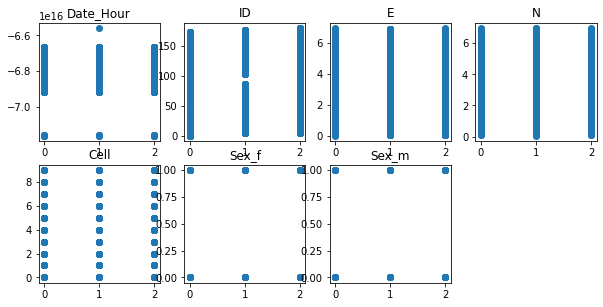

In [217]:
import matplotlib.pyplot as plt
c = ['Date_Hour','ID','E','N','Cell','Sex_f','Sex_m']
plt.figure(figsize=(10,10))
k=0
for i in range(len(c)):
  # if i!=1:
    plt.subplot(4,4, i+1)
    plt.scatter(y,x[:,i])
    plt.xticks([0, 1, 2])
    plt.title(c[i])

In [218]:
np.sum(np.isnan(x), 0)

array([  0,   0, 387, 390,   0,   0,   0])

### Extra 1

The columns 'Date' and 'Hour' could be merged, into a single value (even directly upon reading the CSV file). Explore how to do it either in Pandas or Numpy.

### Extra 2

This file indicates the position (East, North) where some lizards were seen. Each lizar has an ID (ID_e) and has been spotted several times. To infeer the position for those samples where there is no available data, instead of using the mean (or any other imputation method) based on the whole training set, try to calculate the mean (or other statistical value) for that specific lizard based on the training data. Note that, depending on how you divide the data, there could be unknown data in the test set for a lizard that was not included in the training data.

In [194]:
from sklearn.model_selection import StratifiedKFold

x_or = x.copy()
skf = StratifiedKFold(n_splits=5)
for train_indices, test_indices in skf.split(x,x[:,1]):
  lizrard_ids_train = np.unique(x_or[train_indices,1])
  k = 0
  for id in lizrard_ids_train:
    data_per_liz = x[x[:,1]== id ]
    east_data_per_liz = x[x[:,1]== id ][:,2]
    east_mean_per_liz = (np.nanmean(east_data_per_liz))
    north_data_per_liz = x[x[:,1]== id ][:,3]
    north_mean_per_liz = (np.nanmean(north_data_per_liz))
    data_per_liz[np.isnan(data_per_liz[:,2]), 2] = east_mean_per_liz
    data_per_liz[np.isnan(data_per_liz[:,3]), 3] = north_mean_per_liz
    if k ==0:
      appended = data_per_liz
    else:
      # break
      appended = np.append(appended,data_per_liz,axis = 0)      
    k = k+1
      # print( id , east_mean_per_liz)

In [227]:
from sklearn.model_selection import StratifiedKFold

x_or = x.copy()

lizrard_ids = np.unique(x_or[:,1])
k = 0
for id in lizrard_ids:
    data_per_liz = x[x[:,1]== id ]

    east_data_per_liz = x[x[:,1]== id ][:,2]
    east_mean_per_liz = (np.nanmean(east_data_per_liz))

    north_data_per_liz = x[x[:,1]== id ][:,3]
    north_mean_per_liz = (np.nanmean(north_data_per_liz))

    data_per_liz[np.isnan(data_per_liz[:,2]), 2] = east_mean_per_liz
    data_per_liz[np.isnan(data_per_liz[:,3]), 3] = north_mean_per_liz
    x_or[np.isnan(x_or[:,2]), 2] = east_mean_per_liz
    x_or[np.isnan(x_or[:,3]), 3] = north_mean_per_liz

    # if k ==0:
    #   appended = data_per_liz
    # else:
    #   # break
    #   appended = np.append(appended,data_per_liz,axis = 0)      
    # k = k+1
      # print( id , east_mean_per_liz)

In [226]:

x_or[np.isnan(x_or[:,2]), 2]

array([], dtype=float64)